***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 

# ***<u>Chapter 4</u>***

## ***Building Good Training Datasets – Data Preprocessing***

## Dealing with missing data
### Identifying missing values in tabular data

In [1]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## Eliminating training examples or features with missing values

In [2]:
df.isna().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
# df.dropna(axis=0)
# df.dropna(axis=1)

# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
# drop rows that have fewer than 3 real values 
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values


Often, the removal of training examples or dropping of entire feature columns is simply not feasible, because we might lose too much valuable data. In this case, we can use different interpolation techniques to estimate the missing values from the other training examples in our dataset. One of the most common interpolation techniques is mean imputation, where we simply replace the missing value with the mean value of the entire feature column. A convenient way to achieve this is by using the ```SimpleImputer``` class from scikit-learn,


**Other options for the ```strategy``` parameter are ```median```,```contant```  or ```most_frequent``` where the latter replaces the missing values with the most frequent values. This is useful for imputing categorical feature values, for example, a feature column that stores an encoding of color names, such as red, green, and blue.**

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [7]:
# Alternative
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [8]:
df.fillna(df.median())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Additional imputation methods for missing data

**For additional imputation techniques, including the ```KNNImputer``` based on a k-nearest neighbors approach to impute missing features by nearest neighbors, we recommend the scikit-learn imputation documentation at https://scikit-learn.org/stable/modules/impute.html.**

## Handling categorical data
### Nominal and ordinal features

Ordinal features can be understood as categorical values that can be sorted or ordered. For example, t-shirt size would be an ordinal feature, because we can define an order: XL > L > M. In contrast, nominal features don’t imply any order; to continue with the previous example, we could think of t-shirt color as a nominal feature since it typically doesn’t make sense to say that, for example, red is larger than blue.

In [9]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Mapping ordinal features

To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Unfortunately, there is no convenient function that can automatically derive the correct order of the labels of our size feature, so we have to define the mapping manually. In the following simple example, let’s assume that we know the numerical difference between features, for example, XL = L+1 = M+2:

In [10]:
size_mapping = {'XL':3, 'L':2, 'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [11]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels

To encode the class labels, we can use an approach similar to the mapping of ordinal features discussed previously. We need to remember that *class labels are not ordinal*, and it doesn’t matter which integer number we assign to a particular string label. Thus, we can simply enumerate the class labels, starting at 0:

In [12]:
import numpy as np

class_mapping = {label: idx for idx,label in enumerate(np.unique(df.classlabel))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [14]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
# sklearn
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [16]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Performing one-hot encoding on nominal features

In [17]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

After executing the preceding code, the first column of the NumPy array, X, now holds the new color values, which are encoded as follows: 
- ```blue = 0``` 
- ```green = 1``` 
- ```red = 2``` 

If we stop at this point and feed the array to our classifier, we will make one of the most common mistakes in dealing with categorical data. Can you spot the problem? Although the color values don’t come in any particular order, common classification models, such as the ones covered in the previous chapters, will now assume that green is larger than blue, and red is larger than green. Although this assumption is incorrect, a classifier could still produce useful results. However, those results would not be optimal.



A common workaround for this problem is to use a technique called **one-hot encoding.** The idea behind this approach is to create a new dummy feature for each unique value in the nominal feature column. Here, we would convert the color feature into three new features: ```blue```, ```green```, and ```red```. Binary values can then be used to indicate the particular ```color``` of an example; for example, a ```blue``` example can be encoded as ```blue=1```, ```green=0```, ```red=0```.

In [18]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [19]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
# Convenient Way
# one-hot encoding via pandas

pd.get_dummies(df[['color', 'size', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


**When we are using one-hot encoding datasets, we have to keep in mind that this introduces multicollinearity**, which can be an issue for certain methods (for instance, methods that require matrix inversion). If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. **To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array**. Note that we do not lose any important information by removing a feature column, though; for example, if we remove the column ```color_blue```, the feature information is still preserved since if we observe ```color_green=0``` and ```color_red=0```, it implies that the observation must be ```blue```. 

If we use the ```get_dummies``` function, we can drop the first column by passing a ```True``` argument to the ```drop_first``` parameter, as shown in the following code example:

In [21]:
# multicollinearity guard in get_dummies

pd.get_dummies(df,columns=['color'], drop_first=True)

,size,price,classlabel,color_green,color_red
0,1,10.1,class2,1,0
1,2,13.5,class1,0,1
2,3,15.3,class2,0,0


In [22]:
# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Additional encoding schemes for nominal data

While one-hot encoding is the most common way to encode unordered categorical variables, several alternative methods exist. **Some of these techniques can be useful when working with categorical features that have high cardinality (a large number of unique category labels).** Examples include: 
- ***Binary encoding***, which produces multiple binary features similar to one-hot encoding but requires fewer feature columns, i.e., log2(K) instead of K – 1, where K is the number of unique categories. In binary encoding, numbers are first converted into binary representations, and then each binary number position will form a new feature column. 
    
- ***Count or frequency encoding***, which replaces the label of each category by the number of times or frequency it occurs in the training set. 
    
These methods, as well as additional categorical encoding schemes, are available via the scikit-learn-compatible category_encoders library: https://contrib.scikit-learn.org/category_encoders/. While these methods are not guaranteed to perform better than one-hot encoding in terms of model performance, we can consider the choice of a categorical encoding scheme as an additional “hyperparameter” for improving model performance. 

## Optional: encoding ordinal features

If we are unsure about the numerical differences between the categories of ordinal features, or the difference between two ordinal values is not defined, we can also encode them using a threshold encoding with 0/1 values. For example, we can split the feature size with values M, L, and XL into two new features, x > M and x > L.

In [23]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [24]:
# We can use the apply method of pandas DataFrame to write custom
# lambda expressions in order to encode these variables using the 
# value-threshold approach:

df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Partitioning a dataset into a separate training and test set

In [25]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=0.3, 
                                                 random_state=0, 
                                                 stratify=y)

# Providing the class label array y as an argument to stratify ensures 
# that both training and test datasets have the same class proportions 
# as the original dataset.

## Bringing features onto the same scale

- Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. 

- **Decision trees and random forests are two of the very few machine learning algorithms where we don’t need to worry about feature scaling. Those algorithms are scale-invariant.** 

- *However, the majority of machine learning and optimization algorithms behave much better if features are on the same scale.*


The importance of feature scaling can be illustrated by a simple example. Let’s assume that we have two features where one feature is measured on a scale from 1 to 10 and the second feature is measured on a scale from 1 to 100,000, respectively. When we think of the squared error function in Adaline from Chapter 2, it makes sense to say that the algorithm will mostly be busy optimizing the weights according to the larger errors in the second feature. Another example is the k-nearest neighbors (KNN) algorithm with a Euclidean distance measure: the computed distances between examples will be dominated by the second feature axis. 

- Now, there are two common approaches to bringing different features onto the same scale: **normalization and standardization.**

- **Normalization :-** refers to the rescaling the features to a range of [0, 1], which is a special case of **min-max scaling.**
$$x_{norm}^{i} = \frac{x^{i} - x_{min}}{x_{max} - x_{min}}$$


- Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, ***standardization can be more practical for many machine learning algorithms, especially for optimization algorithms such as gradient descent.*** 

- ***The reason is that many linear models, such as the logistic regression and SVM from Chapter 3, initialize the weights to 0 or small random values close to 0.<br> Using standardization, we center the feature columns at $\mu = 0$ with $\sigma = 1$ so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance), which makes it easier to learn the weights.*** 

- However, we shall emphasize that standardization does not change the shape of the distribution, and it does not transform non-normally distributed data into normally distributed data. 

- In addition to scaling data such that it has zero mean and unit variance, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.


- **Standardization :-** $$x_{std}^{i} = \frac{x^{i} - \mu_x}{\sigma_x}$$

In [27]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [28]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [29]:
# A visual example

ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))


standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


------------------------------------------------------------------------
**Again, it is also important to highlight that we fit the ```StandardScaler``` class only once—on the training data—and use those parameters to transform the test dataset or any new data point.**

--------------------------------------------------------------------------


Other, more advanced methods for feature scaling, such as ```RobustScaler```.<br> ```RobustScaler``` is especially helpful and recommended if we are working with small datasets that contain many outliers. 


Similarly, if the machine learning algorithm applied to this dataset is prone to overfitting, ```RobustScaler``` can be a good choice. 


Operating on each feature column independently, ```RobustScaler``` removes the median value and scales the dataset according to the 1st and 3rd quartile of the dataset (that is, the 25th and 75th quantile, respectively) such that more extreme values and outliers become less pronounced. 

```RobustScaler``` - official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

## Selecting meaningful features


- If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of overfitting.

- ***Overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset but does not generalize well to new data; we say that the model has a high variance.***

- The reason for the overfitting is that our model is too complex for the given training data. 

- *Common solutions to reduce the generalization error are as follows:*
    - ***Collect more training data*** 
    - ***Introduce a penalty for complexity via regularization*** 
    - ***Choose a simpler model with fewer parameters*** 
    - ***Reduce the dimensionality of the data***
    


- Here, we will look at common ways ***to reduce overfitting by regularization and dimensionality reduction via feature selection.***

## L1 and L2 regularization as penalties against model complexity


- ***L2 regularization is one approach to reduce the complexity of a model by penalizing large individual weights.***<br> We defined the squared **L2 norm** of our weight vector, w, as follows: $$L2: ||w||_{2}^{2} = \sum_{j=1}^{m}w_j^2$$ 

- ***Another approach to reduce the model complexity is the related L1 regularization:***$$L1: ||w||_{1} = \sum_{j=1}^{m}|w_j|$$ 

- ***In contrast to L2 regularization, L1 regularization usually yields sparse feature vectors, and most feature weights will be zero.***

- **Sparsity can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant, especially in cases where we have more irrelevant dimensions than training examples. <u>In this sense, L1 regularization can be understood as a technique for feature selection.</u>**


### <u>A geometric interpretation of L2 regularization</u>

- ***L2 regularization adds a penalty term to the loss function that effectively results in less extreme weight values compared to a model trained with an unregularized loss function.***<br><br>**We can think of regularization as adding a penalty term to the loss function to encourage smaller weights; in other words, we penalize large weights.**<br><br>***Thus, by increasing the regularization strength via the regularization parameter, $\lambda$, we shrink the weights toward zero and decrease the dependence of our model on the training data.***


- In the left figure we plot the contours of a convex loss function for two weight coefficients, w1 and w2. Here we consider **MSE** loss function.

<table><tr>
<td> <img src="Images/l2_1.png" alt="Drawing" style="width: 900px;"/> </td>
<td> <img src="Images/l2_2.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>


The quadratic L2 regularization term is represented by the shaded ball. Here, our weight coefficients cannot exceed our regularization budget—the combination of the weight coefficients cannot fall outside the shaded area.

On the other hand, we still want to minimize the loss function. Under the penalty constraint, our best effort is to choose the point where the L2 ball intersects with the contours of the unpenalized loss function. The larger the value of the regularization parameter, $\lambda$, gets, the faster the penalized loss grows, which leads to a narrower L2 ball. 

For example, if we increase the regularization parameter toward infinity, the weight coefficients will become effectively zero, denoted by the center of the L2 ball. 

***To summarize the main message of the example, our goal is to minimize the sum of the unpenalized loss plus the penalty term, which can be understood as adding bias and preferring a simpler model to reduce the variance in the absence of sufficient training data to fit the model.*** 


### <u>Sparse solutions with L1 regularization</u>

**L1 regularization and sparsity.** The main concept behind L1 regularization is similar to what we discussed in the previous section. However, since the L1 penalty is the sum of the absolute weight coefficients (remember that the L2 term is quadratic), we can represent it as a diamond-shape budget,

<div>
<img src="Images/l_1.png" style="width: 500px;"/>
</div>

In the preceding figure, we can see that the contour of the loss function touches the L1 diamond at $w_1 = 0$. Since the contours of an L1 regularized system are sharp, it is more likely that the optimum—that is, the intersection between the ellipses of the loss function and the boundary of the L1 diamond—is located on the axes, which encourages sparsity.

In [30]:
# For regularized models in scikit-learn that support L1 regularization, 
# we can simply set the penalty parameter to 'l1' to obtain a sparse solution:

from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1',
                   solver='liblinear',
                   multi_class='ovr')

# solver = 'lbfgs' currently does not support L1-regularized loss optimization

LogisticRegression(penalty='l1')

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', 
                        C=1.0, 
                        solver='liblinear', 
                        multi_class='ovr')

# Note that C=1.0 is the default. You can increase or decrease it 
# to make the regulariztion effect stronger or weaker, respectively.

lr.fit(X_train_std, y_train)


print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


Since we fit the ```LogisticRegression``` object on a multiclass dataset via the **one-versus-rest (OvR)** approach, the first intercept belongs to the model that fits class 1 versus classes 2 and 3, the second value is the intercept of the model that fits class 2 versus classes 1 and 3, and the third value is the intercept of the model that fits class 3 versus classes 1 and 2:

In [33]:
lr.intercept_  # Bias Unit (b)

array([-1.26307756, -1.21583201, -2.37053937])

The weight array that we accessed via the ```lr.coef_``` attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 13 weights, where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input:
$$z = w_1x_1 + \cdots + w_mx_m + b = \sum_{j=1}^{m}x_jw_j + b = w^Tx + b$$

In [34]:
lr.coef_  # Weight parameters (w_i's)

array([[ 1.24589473,  0.18103818,  0.74260089, -1.16030697,  0.        ,
         0.        ,  1.17417572,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54358093,  2.51101194],
       [-1.53727899, -0.38708478, -0.99538056,  0.36504232, -0.05972148,
         0.        ,  0.6681266 ,  0.        ,  0.        , -1.9341495 ,
         1.23332761,  0.        , -2.23121897],
       [ 0.13464518,  0.17020705,  0.35764242,  0.        ,  0.        ,
         0.        , -2.432992  ,  0.        ,  0.        ,  1.56239551,
        -0.81684939, -0.49732098,  0.        ]])

As a result of L1 regularization, which, as mentioned, serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features in this dataset. Strictly speaking, though, the weight vectors from the previous example are not necessarily sparse because they contain more non-zero than zero entries. ***However, we could enforce sparsity (more zero entries) by further increasing the regularization strength—that is, choosing lower values for the ```C``` parameter.***

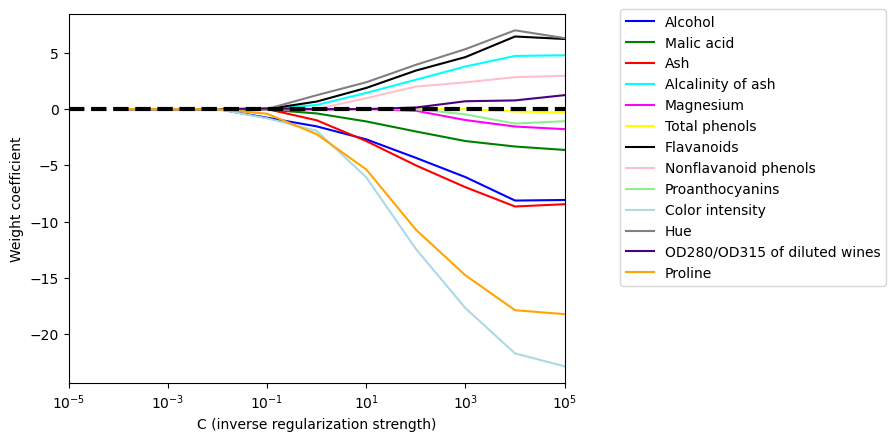

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show();

Above resulting plot provides us with further insights into the **behavior of L1 regularization**. As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01); **C is the inverse of the regularization parameter, $\lambda$**.

## Sequential Feature Selection algorithms

- **An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection,** which is especially useful for ***unregularized models.*** 

- **There are two main categories of dimensionality reduction techniques:**

    - ***Feature Selection and Feature Extraction*** 
    - *Via feature selection, we select a subset of the original features*
    - *whereas in feature extraction, we derive information from the feature set to construct a new feature subspace.*

------------------------------------------------------------------------


- **Sequential feature selection algorithms** are a family of greedy search algorithms that are ***used to reduce an initial $d$-dimensional feature space to a $k$-dimensional feature subspace where $k<d$.*** 

- **The motivation behind feature selection algorithms** is to automatically select a subset of features that are most relevant to the problem, to improve computational efficiency, or to reduce the generalization error of the model by removing irrelevant features or noise, ***which can be useful for algorithms that don’t support regularization.*** 

----------------------------------------------------------------------------

- A classic sequential feature selection algorithm is **<u>Sequential Backward Selection(SBS)</u>**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in the performance of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.


- *The idea behind the SBS algorithm is quite simple*: ***SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features.*** 

----------------------------------------------------------------------------


- ***To determine which feature is to be removed at each stage, we need to define the criterion function, $J$, that we want to minimize.*** The criterion calculated by the criterion function can simply be the difference in the performance of the classifier before and after the removal of a particular feature. 

- Then, the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion; or in more simple terms, ***at each stage we eliminate the feature that causes the least performance loss after removal.***

-------------------------------------------------------------------------------

- *Based on the preceding definition of SBS, we can outline the algorithm in four simple steps:* 

    1. ***Initialize the algorithm with $k = d$, where $d$ is the dimensionality of the full feature space, $X_d$.*** 
    
    2. ***Determine the feature, $x^{-}$, that maximizes the criterion: $x^- = \text{argmax } J(X_k - x)$, where $x \in X_k$.*** 
    
    3. ***Remove the feature, $x^-$, from the feature set: $X_{k-1} = X_k - x^-$; $k = k-1$.*** 
    
    4. ***Terminate if $k$ equals the number of desired features; otherwise, go to step 2.***

In [37]:
# Implementation

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        
        self.estimator = estimator
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X,y,test_size=self.test_size,
                             random_state=self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X, y):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        
        return score

In the preceding implementation, we defined the ```k_features``` parameter to specify the desired number of features we want to return. By default, we use ```accuracy_score``` from scikit-learn to evaluate the performance of a model (an estimator for classification) on the feature subsets. 


Inside the ```while``` loop of the ```fit``` method, the feature subsets created by the ```itertools.combination``` function are evaluated and reduced until the feature subset has the desired dimensionality. 

In each iteration, the accuracy score of the best subset is collected in a list, ```self.scores_```, based on the internally created test dataset, ```X_test```. We will use those scores later to evaluate the results. 

The column indices of the final feature subset are assigned to ```self.indices_```, which we can use via the ```transform``` method to return a new data array with the selected feature columns. 

Note that, instead of calculating the criterion explicitly inside the ```fit``` method, we simply removed the feature that is not contained in the best performing feature subset.

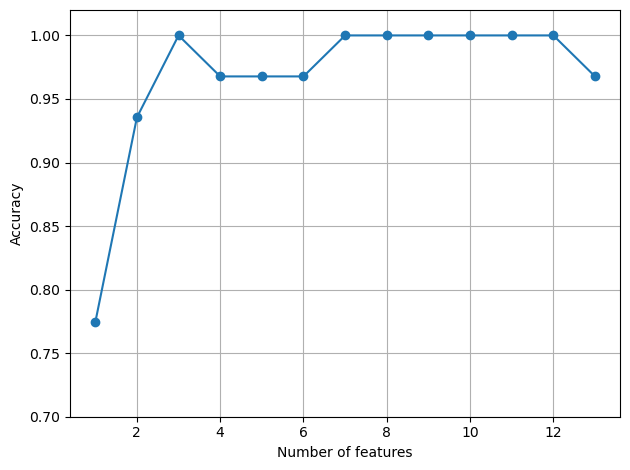

In [38]:
# SBS implementation in action using the KNN classifier from scikit-learn:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show();

In [39]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [40]:
# Performance on actual dataset

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [41]:
# Performance using SBS

knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


## Assessing feature importance with Random Forests

In previous sections, you learned how to use L1 regularization to zero out irrelevant features via logistic regression and how to use the SBS algorithm for feature selection and apply it to a KNN algorithm. 


Another useful approach for selecting relevant features from a dataset is using a random forest, an ensemble technique. Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not. 

Conveniently, the random forest implementation in scikit-learn already collects the feature importance values for us so that we can access them via the ```feature_importances_``` attribute after fitting a ```RandomForestClassifier```. 

By executing the following code, we will now train a forest of 500 trees on the Wine dataset and rank the 13 features by their respective importance measures—remember from our discussion in Chapter 3 that we don’t need to use standardized or normalized features in tree-based models:

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


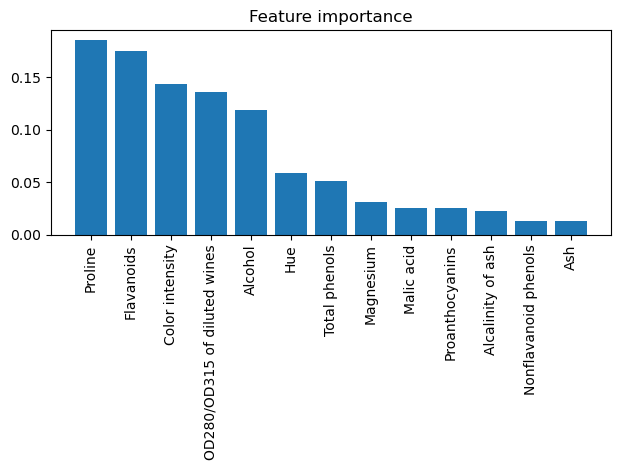

In [42]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show();

We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the 500 decision trees. Interestingly, two of the top-ranked features in the plot are also in the three-feature subset selection from the SBS algorithm that we implemented in the previous section (alcohol concentration and OD280/OD315 of diluted wines). 


However, as far as interpretability is concerned, the random forest technique comes with an important *gotcha* that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information on the other feature(s) may not be fully captured. On the other hand, we don’t need to be concerned about this problem if we are merely interested in the predictive performance of a model rather than the interpretation of feature importance values. 


To conclude this section about feature importance values and random forests, it is worth mentioning that scikit-learn also implements a ```SelectFromModel``` object that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the ```RandomForestClassifier``` as a feature selector and intermediate step in a scikit-learn ```Pipeline``` object, which allows us to connect different preprocessing steps with an estimator, as you will see in Chapter 6, Learning Best Practices for Model Evaluation and Hyperparameter Tuning. For example, we could set the ```threshold``` to ```0.1``` to reduce the dataset to the five most important features using the following code:

In [43]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [44]:
# Now, let's print the 3 features that met the threshold criterion for 
# feature selection that we set earlier

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


## Summary

1. Handling missing values.
2. Encoding categorical Features.
3. Mapping ordinal/nominal feature values to ```int``` representation.

4. Moreover, we briefly discussed L1 regularization, which can help us to avoid overfitting by reducing the complexity of a model. As an alternative approach to removing irrelevant features, we used a sequential feature selection algorithm to select meaningful features from a dataset.

***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 